# Link and Hyperlink Network Analysis (Web Graph Analysis)
Study the network of links between Portuguese news sites archived to understand connectivity and the influence of certain domains over 
time.

In [1]:
from open_site import *

In [2]:
_ , path = open_site("https://arquivo.pt/wayback/cdx?url=publico.pt/*&filter=url:noticia&filter=mime:html&output=json")
print("Cached file: " + path)
print()
with open(path, 'r') as f:
    i = 6
    for line in f:
        if i > 0:
            print(line,end="")
            i -= 1

with open(path, 'r') as f:
    lines = f.readlines()
    print("\nNumber of lines in the file: ", len(lines))

Cached file: .cache/7b12db21a86dd4dcd8394d4a6d26ce3650e103b126944aad4f347e81c10b487f.json

{"urlkey": "pt,publico)/%20culturaipsilon/noticia/o-cardume-da-poesia299050", "timestamp": "20191212000022", "url": "https://www.publico.pt/%20culturaipsilon/noticia/o-cardume-da-poesia299050", "mime": "text/html", "status": "404", "digest": "UKKWM6JJWDOQ3TF72MLQXKTKXPWZVGYY", "length": "67883", "offset": "89879873", "filename": "WEB-20191211235114560-p82.arquivo.pt.warc.gz", "collection": "EAWP28", "source": "$root:EAWP28.cdxj", "source-coll": "$root"}
{"urlkey": "pt,publico)/.../noticia/licao-gnr-1944846...", "timestamp": "20210119001145", "url": "https://www.publico.pt/.../noticia/licao-gnr-1944846...", "mime": "text/html", "status": "404", "digest": "UKKWM6JJWDOQ3TF72MLQXKTKXPWZVGYY", "length": "67926", "offset": "88659946", "filename": "WEB-20210119001120703-p100.arquivo.pt.warc.gz", "collection": "EAWP37", "source": "$root:EAWP37.cdxj", "source-coll": "$root"}
{"urlkey": "pt,publico)/145970

In [3]:
request_urls = lambda year, month: f"https://arquivo.pt/wayback/cdx?url=publico.pt/{year}/{month if month > 9 else '0'+str(month)}*&filter=url:noticia&filter=mime:html&output=json"

path_list = []
def collect_info(url_):
    _ , path = open_site(url_)
    path_list.append(path)
    with open(path, 'r') as f:
        lines = f.readlines()
        if len(lines) == 100000:
            print("\033[91m", end="")
            print(f"[WARNING] The file has 100000 lines {i}-{j}")
            print("\033[0m", end="")
            path_list.pop()
    
for i in range(1995, 2025):
    for j in range(1, 13):
        collect_info(request_urls(i, j))

[WARNING] The file has 100000 lines 2019-1
[WARNING] The file has 100000 lines 2020-9
[WARNING] The file has 100000 lines 2020-10


In [4]:
request_urls2 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2020/9/{day}*&filter=url:noticia&filter=mime:html&output=json"
request_urls3 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2020/10/{day}*&filter=url:noticia&filter=mime:html&output=json"
request_urls4 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2019/1/{day}*&filter=url:noticia&filter=mime:html&output=json"
for day in range(1, 32):
    collect_info(request_urls2(day))
    collect_info(request_urls3(day))
    collect_info(request_urls4(day))

all_texts = ""
for path in path_list:
    with open(path, 'r') as f:
        all_texts += f.read()
with open(".cache/all_requests.txt", 'w') as f:
    f.write(all_texts)
with open(".cache/all_requests.txt", 'r') as f:
    lines = f.readlines()
    print("\nNumber of lines in the file: ", len(lines))


Number of lines in the file:  2545361


In [5]:
url_helena = "https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152"
parse_url(url_helena)

('https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 '25/05/1996',
 'culturaipsilon',
 'entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152')

In [6]:
try:
    print(parse_url(url_helena+"?args=23")) # SHOULD ERROR !
except Exception as e:
    print(e)
try:
    print(parse_url(url_helena+"/embed")) # SHOULD ERROR !
except Exception as e:
    print(e)
try:
    print(parse_url(url_helena+"#comments")) # SHOULD ERROR !
except Exception as e:
    print(e)

Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152?args=23
Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152/embed
Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152#comments


In [7]:
l = parse_big_file(".cache/all_requests.txt")
with open(".cache/filtered.json","w",encoding="utf-8") as f:
    f.write(json.dumps(l))

2545361


In [8]:
with open(".cache/filtered.json","r",encoding="utf-8") as f:
    l = json.loads(f.read())

In [9]:
print(len(l))
helena = l[url_helena]
helena

170809


{'url': 'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'date': '25/05/1996',
 'category': 'culturaipsilon',
 'title': 'entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'number': 3,
 'timestamp': 20180801041640}

'<!doctype html>\n\n<html class="no-js user--anonymous" lang="pt">\n\n<head>\n\n    <meta charset="UTF-8">\n\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no, user-scalable=no">\n\n    <title>Entrevista a Helena Sá e Costa publicada em 25-05-1996 | A música não pode ficar estática | PÚBLICO</title>\n\n\t<meta itemprop="name" content="Entrevista a Helena Sá e Costa publicada em 25-05-1996">\n\n    <meta name="description" content="Faz amanhã 83 anos que Helena Sá e Costa nasceu, no Porto, no seio de uma família de artistas da música — dos quais o que mais se destacou foi o pai, o compositor e pianista Luís Costa. Mais de oito décadas depois, a pianista e professora que formou">\n\n    <meta name="keywords" content="Porto, Música, Cultura-Ípsilon">\n\n    <meta name="news_keywords" content="Porto, Música, Cultura-Ípsilon">\n\n\n\n    <link rel="amphtml" href="https://www.publico.pt/199
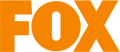
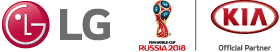

In [10]:
url = helena["url"]
timestamp = helena["timestamp"]
url = f"https://arquivo.pt/noFrame/replay/{timestamp}id_/{url}"
helena_file , path = open_site(url)
helena_file

In [11]:
urls_helena = extract_urls(helena_file)
urls_helena

{'http://blogues.publico.pt/provedordoleitor/',
 'http://cinecartaz.publico.pt',
 'http://cinecartaz.publico.pt/',
 'http://coleccoes.publico.pt',
 'http://comunique.publico.pt/cartaopublico/',
 'http://comunique.publico.pt/cartaopublico/#/',
 'http://emprego.publico.pt/',
 'http://feeds.feedburner.com/PublicoRSS',
 'http://imobiliario.publico.pt',
 'http://inimigo.publico.pt',
 'http://inimigo.publico.pt/',
 'http://lazer.publico.pt',
 'http://lazer.publico.pt/',
 'http://lazer.publico.pt/GuiaTV',
 'http://loja.publico.pt',
 'http://outdatedbrowser.com/pt-br',
 'http://p3.publico.pt',
 'http://p3.publico.pt/',
 'http://schema.org',
 'http://static.publico.pt/publicomais/',
 'http://static.publico.pt/sites/projectos/Publicitacao-Projecto-SI_IDT-PGlobal.pdf',
 'http://www.bmw.pt/teleservices',
 'http://www.w3.org/2000/svg',
 'https://a.brpx.io/ub.min.js',
 'https://acervo.publico.pt/utilizador/moderacao',
 'https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js',
 'https://api

In [12]:
urls2 = set()
for url in urls_helena:
        try:
            r = parse_url(url)
        except Exception as e:
            continue
        urls2.add(r[0])
print(urls2) # This urls migth not be in l dict but filters most links
process_site(url_helena, l, l[url_helena]["number"])

{'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152'}


('train/processed/3.txt', [3])

: 

In [ ]:
l2 = process_filtered_sites(l,24550)
l2[:5]

24879/170809

In [2]:
with open(".cache/filtered_and_connections.json", 'w') as f:
    f.write(json.dumps(l2))

NameError: name 'l2' is not defined

In [1]:
with open(".cache/filtered_and_connections.json", 'r') as f:
    s = f.read()
    l2 = json.loads(s)

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_and_connections.json'

In [15]:
add_all_pages_to_neo4h(l2)

Progress: 170807/170807
Progress: 73994/170807

[#E41D]  _: <CONNECTION> error: Failed to read from defunct connection IPv4Address(('localhost', 7687)) (ResolvedIPv6Address(('::1', 7687, 0, 0))): TimeoutError('timed out')
Transaction failed and will be retried in 1.0307625472548334s (Failed to read from defunct connection IPv4Address(('localhost', 7687)) (ResolvedIPv6Address(('::1', 7687, 0, 0))))


Progress: 170807/170807


170807
169727


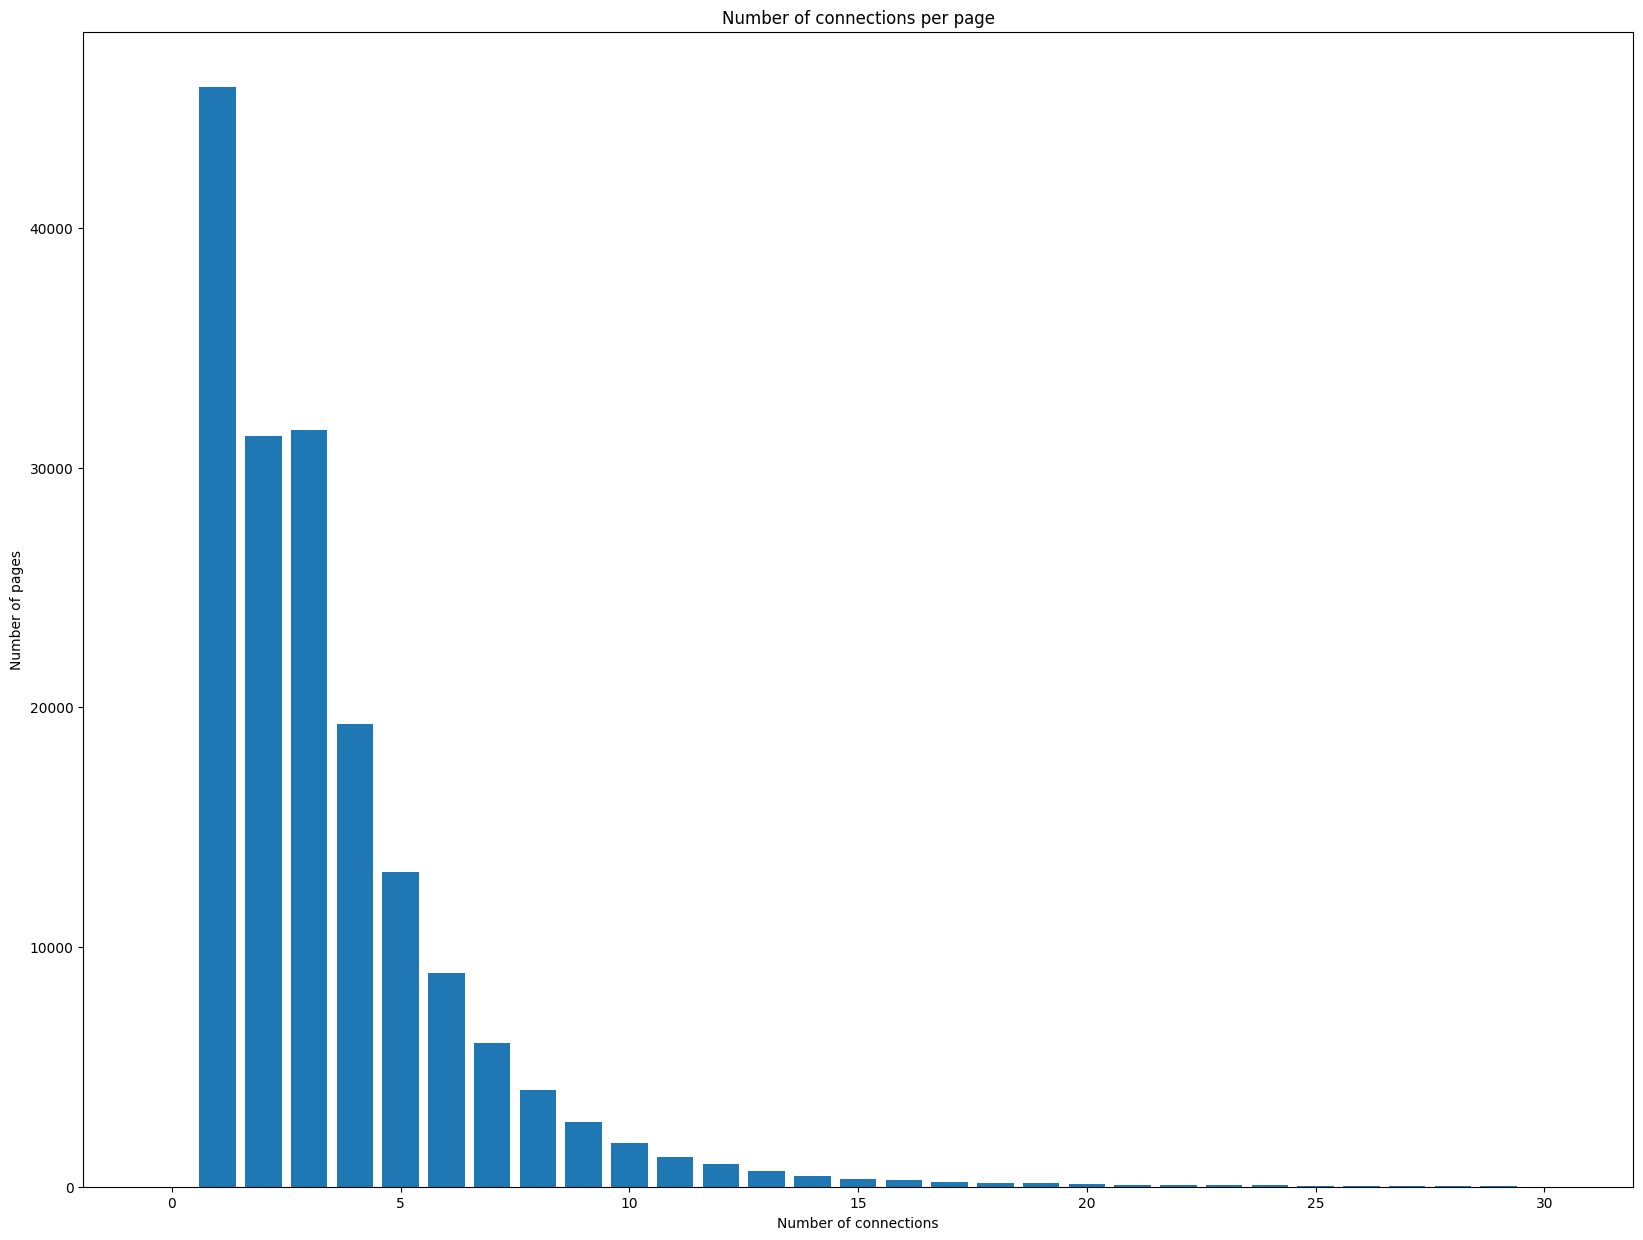

In [23]:
res = driver.execute_query("match (n)--() return n.number , count(*) as c order by c desc ")
c = [r['c'] for r in res.records][1:]
print(len(c))

bar_plot_bars = { i:0 for i in range(0, 31) }
for r in c:
    if r < 30:
        bar_plot_bars[r] += 1

print(sum(bar_plot_bars.values()))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.bar(bar_plot_bars.keys(), bar_plot_bars.values())
plt.xlabel("Number of connections")
plt.ylabel("Number of pages")
plt.title("Number of connections per page")
plt.show()

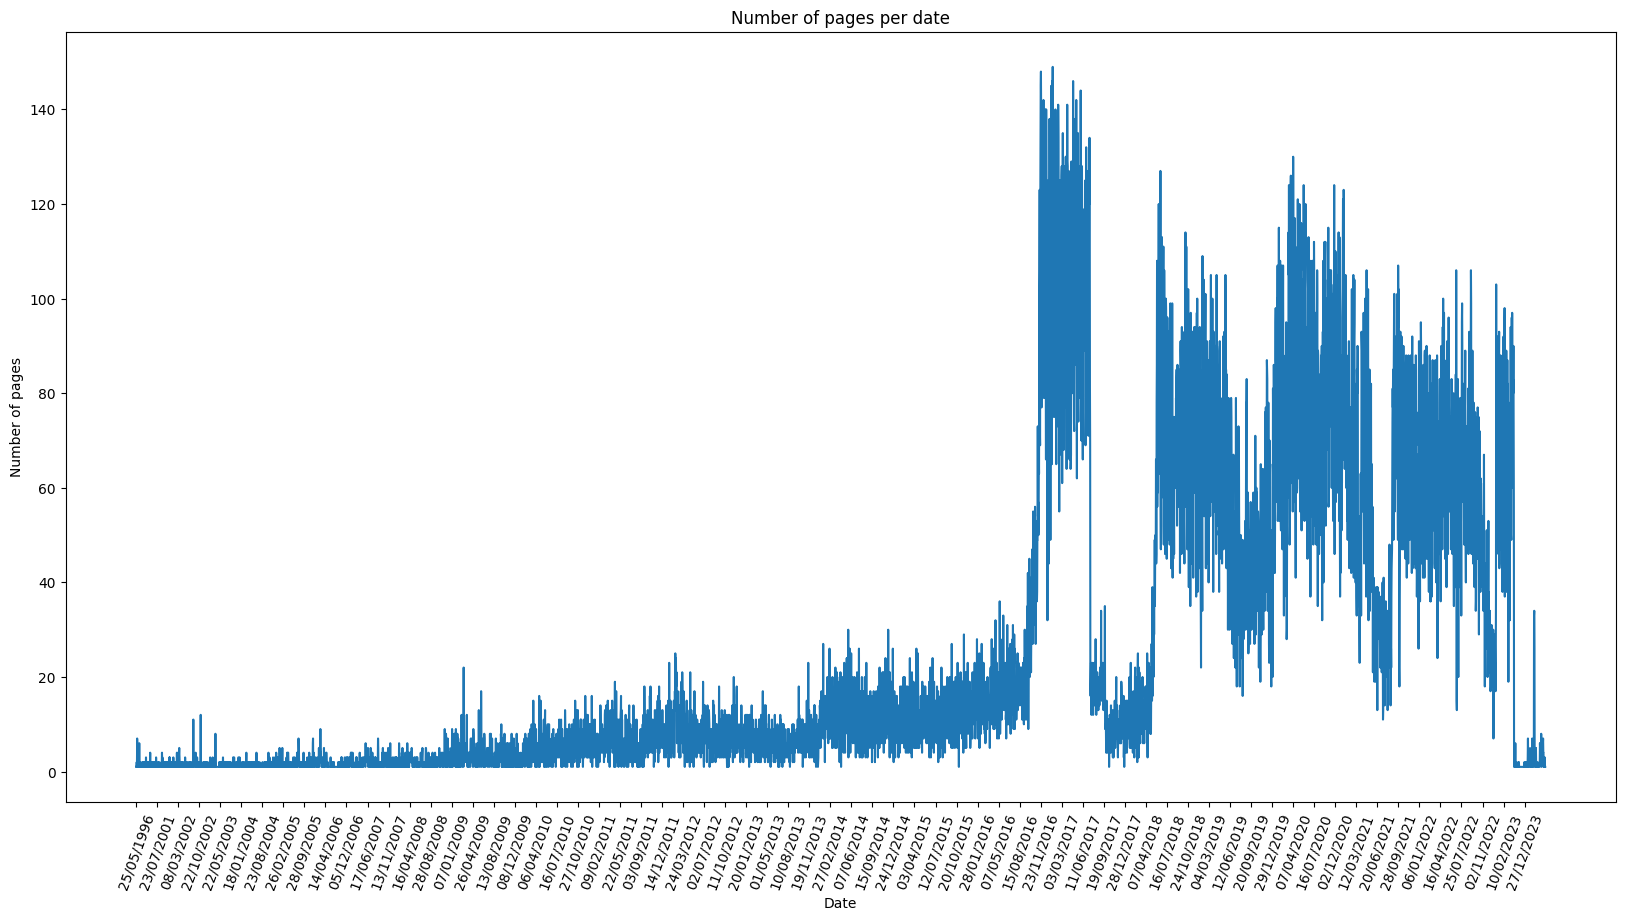

In [4]:
import datetime


res = driver.execute_query("match (n) return n.date as date, count(*) as c order by date desc")

plt.figure(figsize=(20,10))
dates = [(r['date'],r['c']) for r in res.records]

sort_func = lambda x: datetime.datetime.strptime(x[0], '%d/%m/%Y')
dates.sort(key=sort_func)

counts_date = [x[1] for x in dates]
dates_date = [x[0] for x in dates]

plt.plot(dates_date, counts_date)
plt.xlabel("Date")
plt.ylabel("Number of pages")
plt.xticks([d for i,d in enumerate(dates_date) if i%100==0], rotation=70)
plt.title("Number of pages per date")
plt.show()

In [13]:
documents = {}
i = 0
for root, dirs, files in os.walk("train/processed"):
    for file in files:
        with open(os.path.join(root, file), 'r', encoding="utf-8") as f:
            i = i +1
            if i % 100 == 0:
                print(f"\r{i}/{len(files)}",end="")
            documents[int(file.split(".")[0])] = f.read()
with open("train/processed/text.json", 'w', encoding="utf-8") as f:
    f.write(json.dumps(documents))
print(f"\r{i}/{len(files)}",end="")

170791/170791

In [2]:
with open("train/processed/text.json", 'r', encoding="utf-8") as f:
    text = json.loads(f.read())
text = { int(i):text[i] for i in sorted(text,key= lambda x: int(x))}
with open(".cache/filtered.json","r",encoding="utf-8") as f:
    nodes = json.loads(f.read())
nodes = { int(nodes[i]["number"]):nodes[i] for i in nodes}
nodes = {i:nodes[i] for i in sorted(nodes)}

In [3]:
map_cat_dict = {"Sociedade":"Sociedade",
         "Politica":"Politica",
         "Mundo":"Mundo",
         "Economia":"Economia",
         "Culturaipsilon":"Cultura",
         "Desporto":"Desporto",
         "Local":"Local",
         "Ciencia":"Ciencia",
         "P3":"Outro",
         "Fugas":"Cultura",
         "Impar":"Cultura",
         "Tecnologia":"Ciencia",
         "Opiniao":"Outro",
         "Azul":"Outro",
         "Culto":"Cultura",
         "Portugal":"Politica",
         "Estudiop":"Cultura",
         "Ecosfera":"Outro",
         "Terroir":"Cultura",
         "Edicoes-publico":"Outro",
         "Publico-escola":"Outro",
         "Multimedia":"Outro",
         "Educacao":"Outro",
         "Conteudo-patrocinado":"Outro",
         "Media":"Outro",
         "Pol%c3%adtica":"Politica",
         "Geral":"Outro",
         "Trabalho":"Outro",}

def map_cat(st: str):
    st = st.lower().capitalize()
    return map_cat_dict[st]

In [4]:
label_names = []
with open("train/labels/label_names.csv") as f:
    f.readline()
    label_names = f.readline().strip().split(";")
print(label_names)
labels = {}
with open("train/labels/labels_1.txt") as f:
    for line in f:
        n , label = line.strip().split(":")
        labels[int(n)] = label
# labels = {key: labels[key] for key in sorted(labels)}
labels = {key: map_cat(nodes[key]["category"]) for key in nodes}
list(labels.items())[:5]

['Sociedade', 'Politica', 'Mundo', 'Economia', 'Cultura', 'Desporto', 'Ciencia', 'Local', 'Outro']


[(3, 'Cultura'),
 (10, 'Cultura'),
 (20, 'Mundo'),
 (35, 'Politica'),
 (38, 'Politica')]

In [5]:
len(text) , len(labels)

(170790, 170809)

In [6]:
documents = []
for i in text.keys():
    # documents.append(nodes[i]["category"] + " " + "".join(w + " " for w in nodes[i]["title"].split("-")) + " " + text[i][:200])
    documents.append( "".join(w + " " for w in nodes[i]["title"].split("-")) + " " + text[i][:2000])
len(documents)

170790

In [7]:
import numpy as np
Y = np.zeros((len(text),))
for i,l in enumerate(text.keys()):
    Y[i] = label_names.index(labels[l])
Y[:5]

array([4., 4., 2., 1., 1.])

In [8]:
documents[0]

'entrevista a helena sa e costa publicada em 25051996 1244152    pianista professora Helena Sá Costa hoje homenagear Porto Câmara atribui-lhe medalha honra cidade Fundação Engº. António Almeida editar biografia escrita Filipe Pires aluno mostrar ela piano fruto ensinamento senhora música feliz amanhã ano Helena Sá Costa nascer Porto seio família artista música destacar pai compositor pianista Luís Costa década pianista professora formar marcar várias geração músico melómano continuar surpreendê-los contemplá-los energia generosidade invulgar intervalo vaivém Porto-Guimarães causa Encontros Primavera dirigir preparação viagem Covilhã presidir júri regressar concurso música cidade atenção aluno continuar frequentar casa Helena Sá Costa falar Público homenagem prestar Porto recordar história família música figura   PUB PÚBLICO hoje homenagear presença ex-aluno direito livro biográfico HELENA SÁ COSTA Fiquei confusa presidente Fundação António Almeida dr. Aguiar Branco comunicar ir festa l

In [9]:
tfi_mat , tfi_names = tfidf(documents,min_df=5, max_df=0.9)

In [10]:
tfi_mat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 23743049 stored elements and shape (170790, 89801)>

In [11]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(tfi_mat)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
pca = pca.transform(tfi_mat)

[0.00709935 0.00512795 0.00422108]
0.01644837909669391


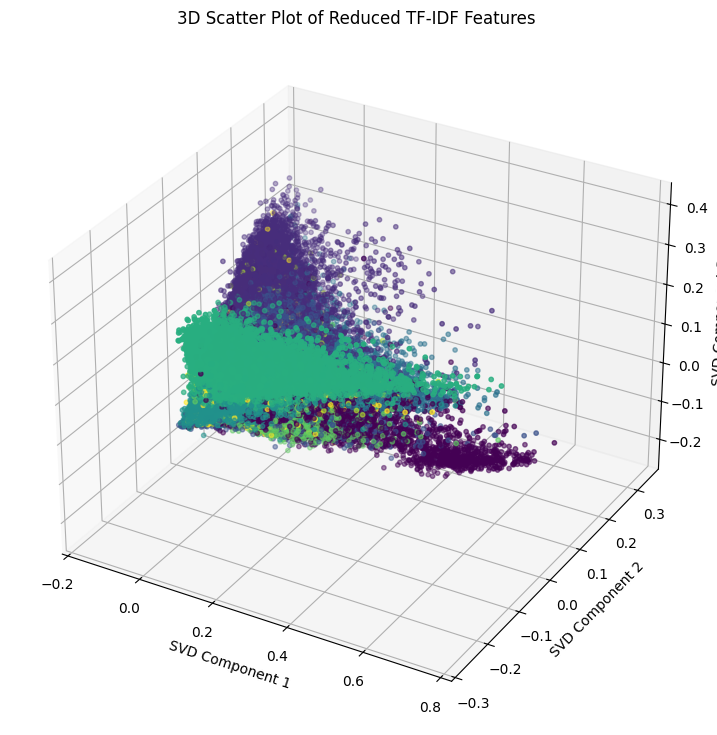

In [12]:
# scatter of points 3D
import matplotlib.pyplot as plt

# 3D plot
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(
    pca[:,0],  # X-axis
    pca[:,1],  # Y-axis
    pca[:,2],  # Z-axis
    c=Y,             # Color
    marker='o',           # Marker style
    s=10                  # Marker size
)

# Label axes
ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')
ax.set_title('3D Scatter Plot of Reduced TF-IDF Features')
plt.show()

In [13]:
reduced_tfidf = tfi_mat
# truncated SVD
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=100)
# svd.fit(reduced_tfidf)  

# reduced_tfidf = svd.transform(reduced_tfidf)

In [14]:
counts_label = { label: 0 for label in label_names }
for i in labels.values():
    counts_label[i] += len(documents) / len(labels)
print(len(labels))
counts_label

170809


{'Sociedade': 30156.64514164536,
 'Politica': 22825.46071927994,
 'Mundo': 22068.544924444886,
 'Economia': 19990.7760715159,
 'Cultura': 29016.771949951883,
 'Desporto': 18768.912001121662,
 'Ciencia': 8734.028359160484,
 'Local': 9902.89832502862,
 'Outro': 9325.962507829378}

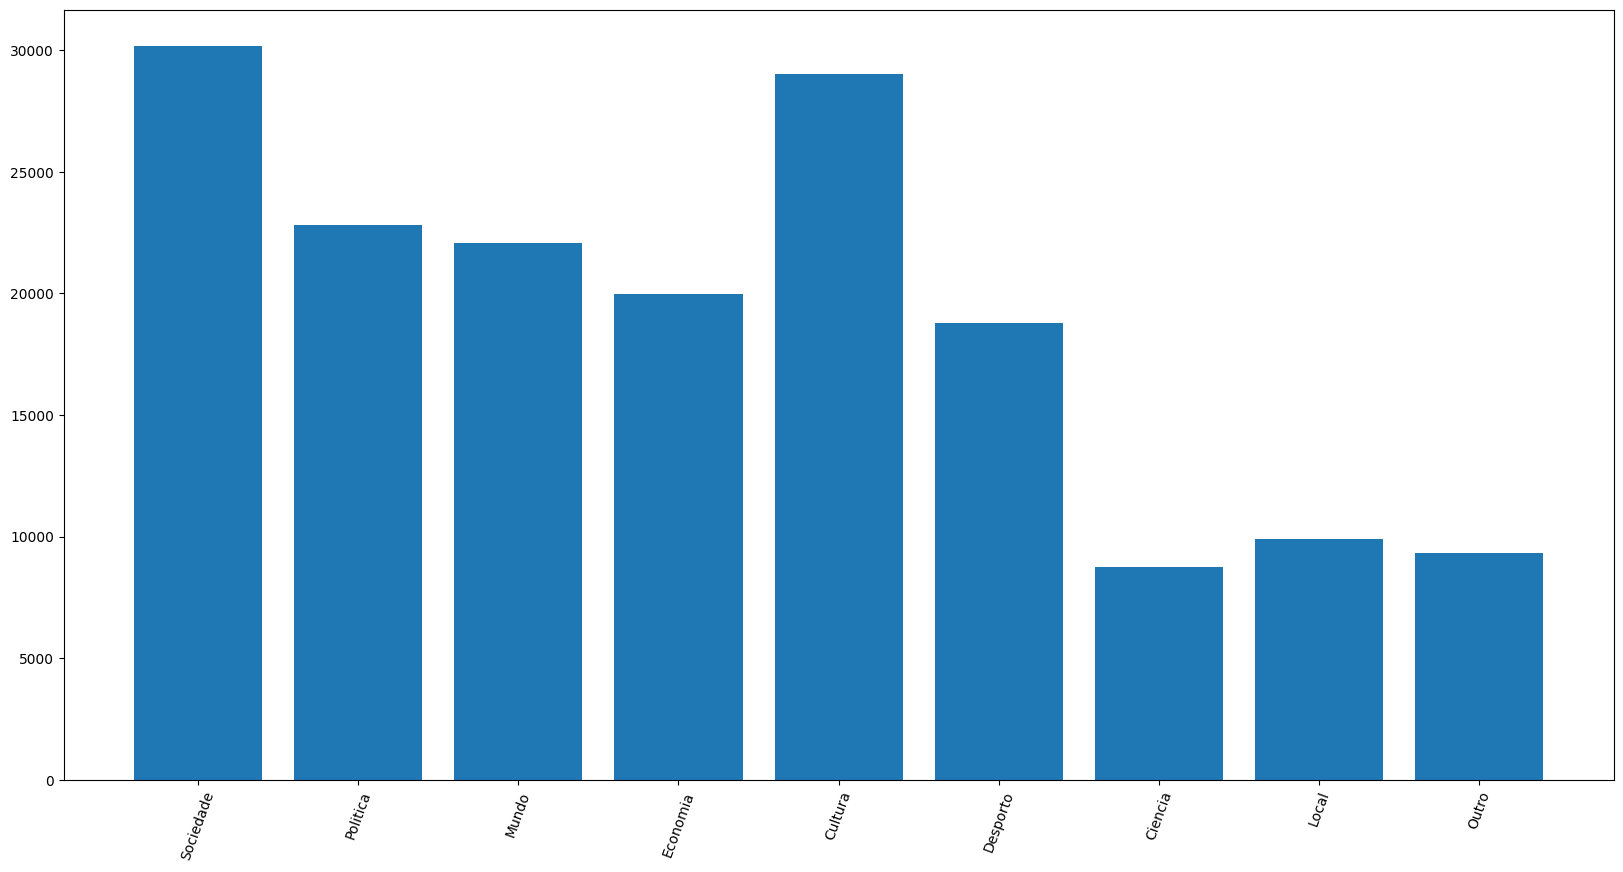

In [15]:
# plot hist of classes
plt.figure(figsize=(20,10))
plt.bar(list(counts_label.keys()),list(counts_label.values()))
plt.xticks(rotation=70)
plt.show()


In [16]:

X = reduced_tfidf

In [17]:
# make test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train.shape , Y_train.shape

((145171, 89801), (145171,))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

# Define the MLPClassifier
models = [
    MLPClassifier(
        hidden_layer_sizes=(10,12),  
        activation="relu",            
        solver="sgd",                
        max_iter=300,                 
        random_state=42,              
        alpha=0.01,
        verbose=True
    ),
    LogisticRegression(max_iter=5000, random_state=42,penalty="l2",C=5,solver = "lbfgs",multi_class="ovr"),
    RandomForestClassifier(n_estimators=50,max_depth=10),
]


model = VotingClassifier(
    estimators=[(str(i),model) for i, model in enumerate(models)],
    voting='soft'  # Use 'soft' for probability averaging; 'hard' for majority voting
)
model = models[1]
# Train the MLP on the training data
model.fit(X_train, Y_train)

/home/kiko/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=5, max_iter=5000, multi_class='ovr', random_state=42)

Test Accuracy: 0.84
Train Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      4413
         1.0       0.83      0.81      0.82      3354
         2.0       0.89      0.91      0.90      3368
         3.0       0.84      0.86      0.85      3015
         4.0       0.84      0.90      0.87      4371
         5.0       0.97      0.98      0.98      2869
         6.0       0.78      0.77      0.77      1296
         7.0       0.78      0.68      0.73      1551
         8.0       0.71      0.53      0.61      1382

    accuracy                           0.84     25619
   macro avg       0.83      0.81      0.82     25619
weighted avg       0.84      0.84      0.84     25619


Confussion Matrix
[[3642  187   61  109  130   21   83  107   73]
 [ 259 2725   61  178   38   10   12   41   30]
 [  79   49 3053   33   94    6   32    0   22]
 [  87  136   58 2600   43    4   28   44   15]
 [ 112   36   71   

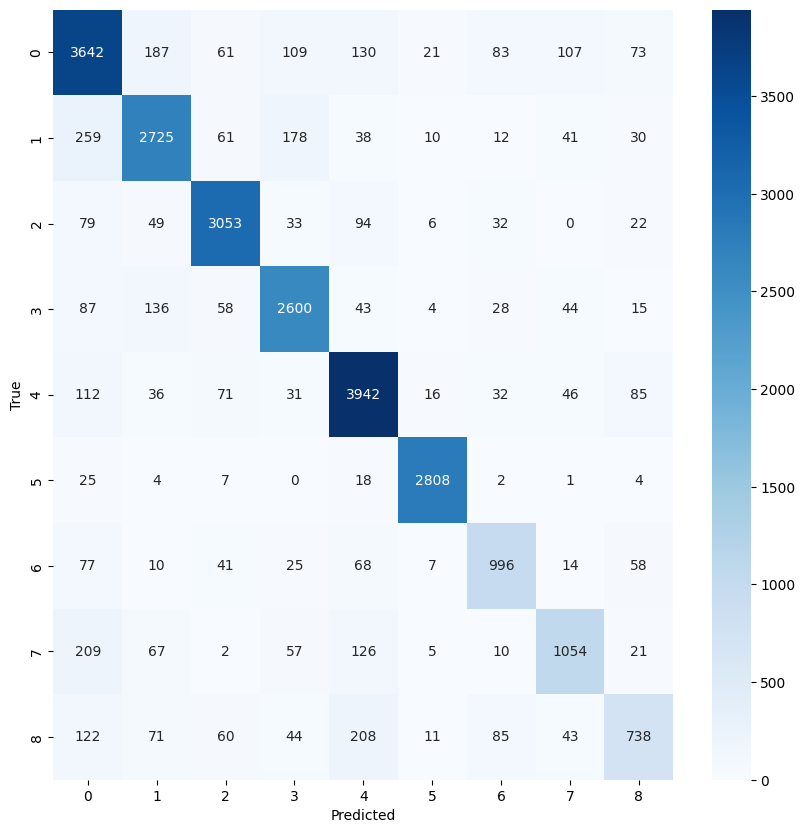

In [19]:
# Predict on the test data
Y_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
accuracy_train = accuracy_score(Y_train, Y_train_pred)
print(f"Train Accuracy: {accuracy_train:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
print("\nConfussion Matrix")
print(confusion_matrix(Y_test, Y_pred))

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
# LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# Check if we have a GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print("Using GPU:" , tf.config.experimental.list_physical_devices('GPU')[0])


vocab_size = 10000 # arbitrarily chosen
embed_size = 32 # arbitrarily chosen
maxlen = max(len(x.split()) for x in documents) # length of the longest text
print("Longest text length:", maxlen)

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(documents)
X = tokenizer.texts_to_sequences(documents)
X = pad_sequences(X)

2024-12-19 21:51:43.862712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734645103.943825  153336 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734645103.968349  153336 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 21:51:44.196483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Longest text length: 377


In [ ]:
# Make the model
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
model.add(Bidirectional(LSTM(32, return_sequences=True))) 
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPooling1D()) 
model.add(Dense(16, activation='relu' , kernel_regularizer='l2'))
model.add(Dense(16, activation='relu' , kernel_regularizer='l2'))
model.add(Dense(len(label_names), activation='softmax'))
model.summary()

/home/kiko/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1734645199.508753  153336 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6172 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X, Y, validation_split=0.1, epochs=20, batch_size=256, callbacks=[EarlyStopping(patience=4)])

Epoch 1/20


I0000 00:00:1734645203.431644  153635 cuda_dnn.cc:529] Loaded cuDNN version 90300


601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.3942 - loss: 1.8698 - val_accuracy: 0.7306 - val_loss: 0.9733
Epoch 2/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.7750 - loss: 0.8591 - val_accuracy: 0.7479 - val_loss: 0.8778
Epoch 3/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.8059 - loss: 0.7328 - val_accuracy: 0.7581 - val_loss: 0.8406
Epoch 4/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.8255 - loss: 0.6534 - val_accuracy: 0.7653 - val_loss: 0.8051
Epoch 5/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.8418 - loss: 0.5926 - val_accuracy: 0.7733 - val_loss: 0.7824
Epoch 6/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.8570 - loss: 0.5393 - val_accuracy: 0.7690 - val_loss: 0.8010
Epoch 7/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.8687 - loss: 0.4999 - val_accuracy: 0.7813 - val_loss: 0.7713
Epoch 8/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.8807 - loss: 0.4614 - val_accurac

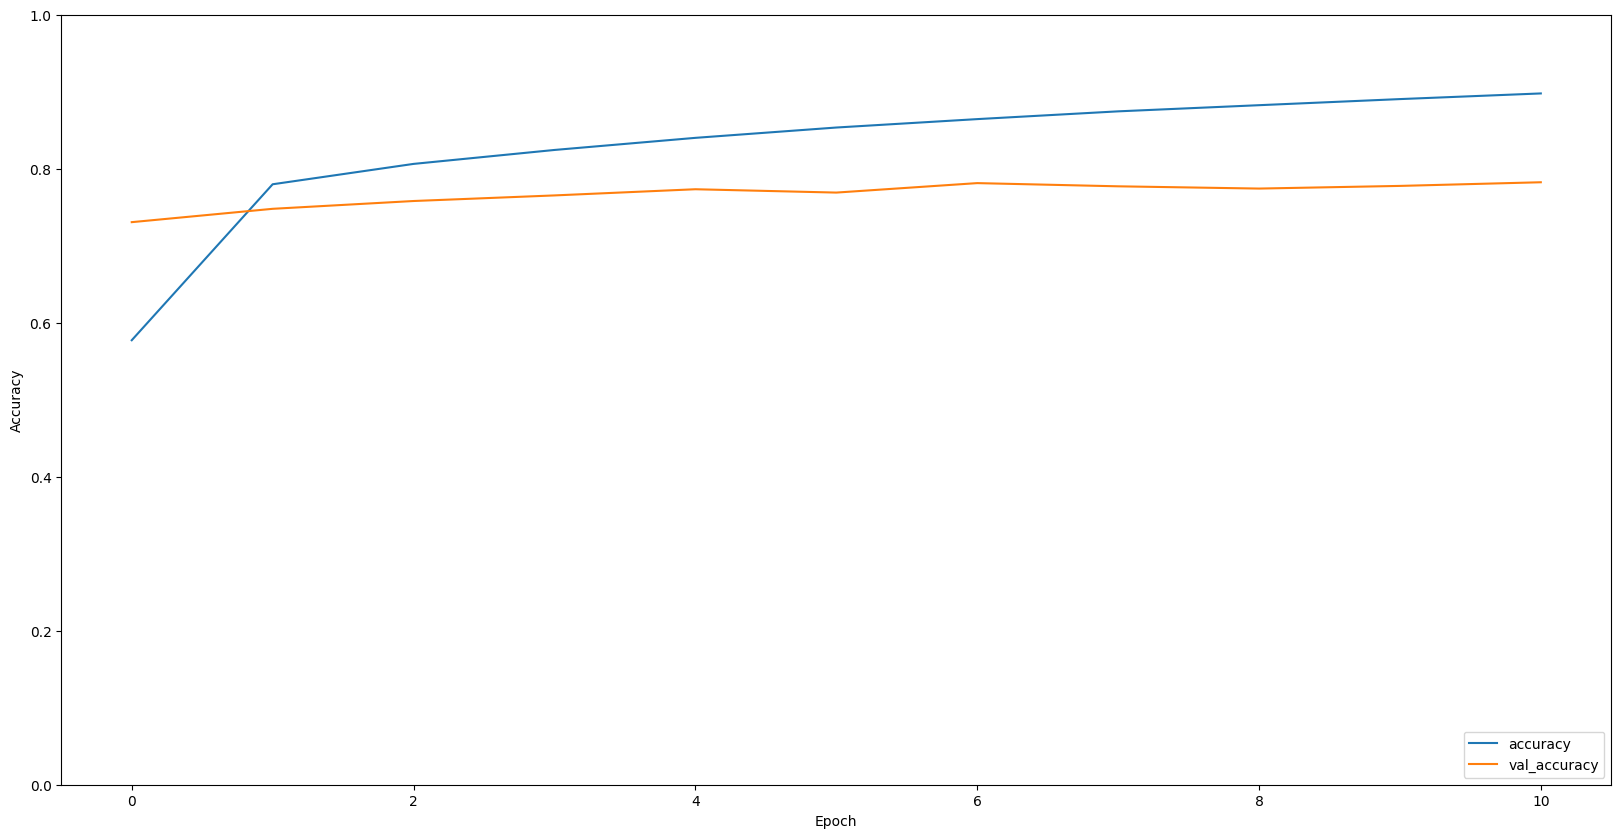

In [24]:
# Plot the training history
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [28]:
# Compute the metrics
import pickle

Y_pred_ = model.predict(X)

5338/5338 ━━━━━━━━━━━━━━━━━━━━ 73s 14ms/step


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     30159
         1.0       0.87      0.92      0.90     22826
         2.0       0.94      0.95      0.95     22070
         3.0       0.93      0.91      0.92     19992
         4.0       0.92      0.94      0.93     29013
         5.0       0.98      0.99      0.98     18769
         6.0       0.85      0.83      0.84      8733
         7.0       0.83      0.85      0.84      9901
         8.0       0.75      0.60      0.67      9327

    accuracy                           0.90    170790
   macro avg       0.89      0.88      0.88    170790
weighted avg       0.90      0.90      0.90    170790


Confussion Matrix
[[27026  1047   226   352   332    63   244   588   281]
 [  781 21061    80   393   185    54    10   217    45]
 [  230   348 20959   103   201    30   134     2    63]
 [  413   865   102 18154    15    50    99   218    76]
 [  209  

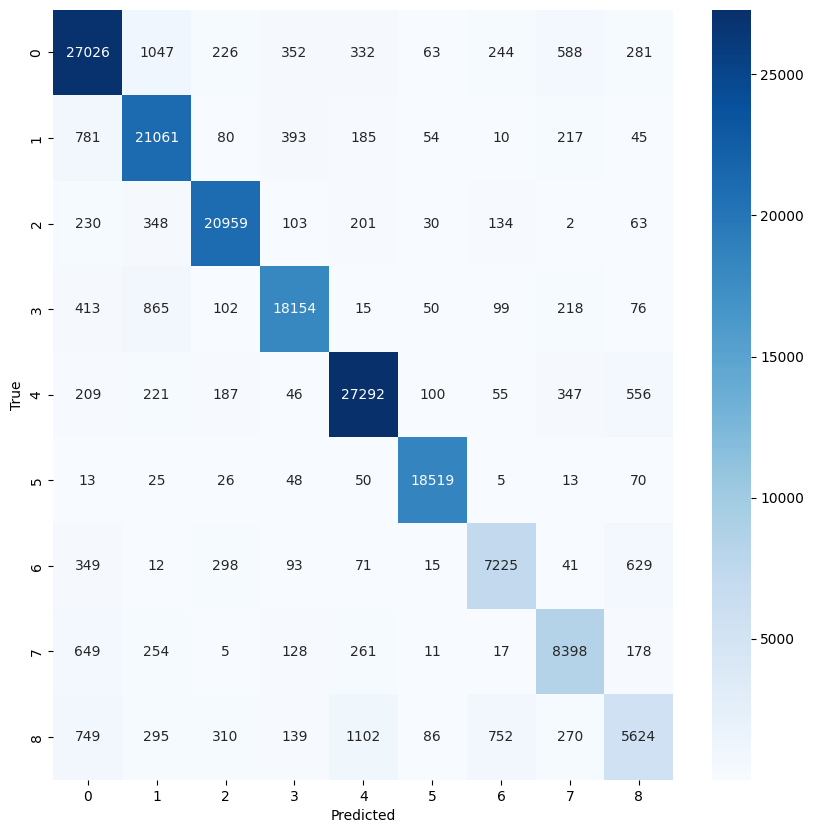

In [29]:
Y_pred = np.argmax(Y_pred_, axis=1)

accuracy = accuracy_score(Y, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y, Y_pred))

# Confusion Matrix
print("\nConfussion Matrix")
print(confusion_matrix(Y, Y_pred))

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(Y, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the model
model.save('model.keras')

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)